In [ ]:
# I. amazon.csv

In [107]:
#Import all necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv(r"C:\Users\cmigu\OneDrive\amazon.csv", encoding = "ISO-8859-1")

# 1. Display top 10 rows of the dataset.

In [109]:
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


# 2. Check last 10 rows.


In [110]:
df.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01
6448,2011,Tocantins,Dezembro,105.0,2011-01-01
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3. Find shape of the dataset (number of rows and number of columns).


In [111]:
shape=df.shape

print("Number of Rows:", shape[0], "\n" "Number of Columns:", shape[1])

Number of Rows: 6454 
Number of Columns: 5


# 4. Get information about the dataset like total number rows, total number of columns, datatypes of each column and memory requirement.


In [112]:
shape=df.shape
print("Total number of rows:", shape[0])
print("Total number of columns:", shape[1])
print("Data types of each column:")
print(df.dtypes)
print("Memory requirement (in bytes):", df.memory_usage(deep=True).sum())

Total number of rows: 6454
Total number of columns: 5
Data types of each column:
year        int64
state      object
month      object
number    float64
date       object
dtype: object
Memory requirement (in bytes): 1380874


# 5. Check for duplicate data and drop them.


In [113]:
df.duplicated()
df.drop_duplicates(inplace=True)
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


# 6. Check null values in the dataset.


In [114]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7. Get overall statistics about the dataframe.


In [115]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,6422.0,2007.490969,5.731806,1998.0,2003.0,2007.000,2012.0,2017.0
number,6422.0,108.815178,191.142482,0.0,3.0,24.497,114.0,998.0


# 8. Rename month names to English.


In [116]:
df2=df.drop_duplicates()

In [120]:
month_map = {
    'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 'Maio': 'May',
    'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September', 'Outubro': 'October',
    'Novembro': 'November', 'Dezembro': 'December'
}

df2['month'] = df2['month'].replace(month_map)

df2

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


# 9. Get the total number of fires registered.

In [156]:
total_fires= df2["number"].sum()

print(total_fires)

698811.073


# 10. In which month maximum number of forest fires were reported?

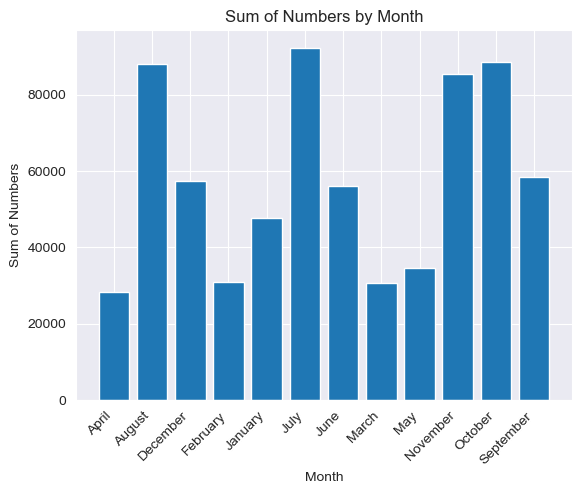

According to the graph, the month of July has the maximum number of forest fire reported, tallying with 92319.113


In [157]:
df2.groupby('month')['number'].sum()

result = df2.groupby('month')['number'].sum()

months = result.index
sums = result.values

plt.bar(months, sums)
plt.xlabel('Month')
plt.ylabel('Sum of Numbers')
plt.title('Sum of Numbers by Month')

plt.xticks(range(len(months)), months, rotation='45', ha='right')

plt.show()

print("According to the graph, the month of July has the maximum number of forest fire reported, tallying with", monthly_sums.max())

# 11. In which year maximum number of forest fires was reported?

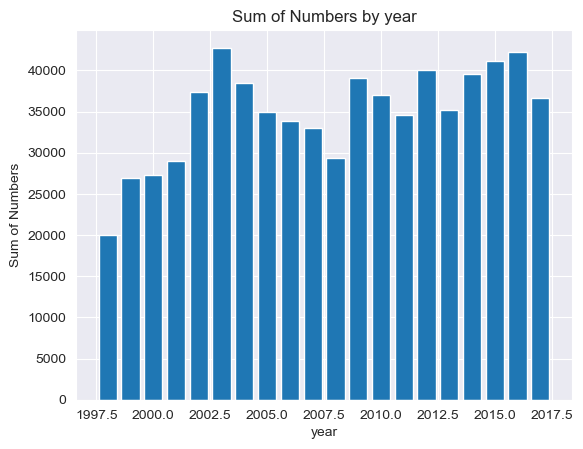

According to the graph, the year of 2003 has the maximum number of forest fire reported, tallying with 42760.674


In [158]:
df2.groupby('year')['number'].sum()

result = df2.groupby('year')['number'].sum()

years = result.index
sums = result.values

plt.bar(years, sums)
plt.xlabel('year')
plt.ylabel('Sum of Numbers')
plt.title('Sum of Numbers by year')


plt.show()

print("According to the graph, the year of 2003 has the maximum number of forest fire reported, tallying with", df2.groupby('year')['number'].sum().max())

# 12. In which state maximum number of forest fires was reported?

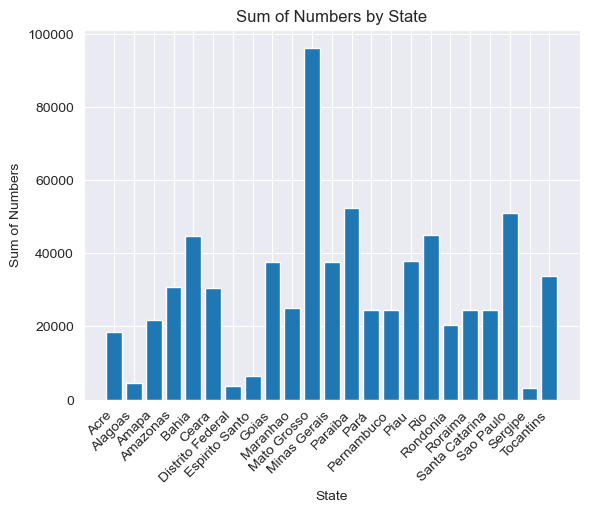

According to the graph, the state of Mato Grosso has the maximum number of forest fire reported, tallying with  96246.028


In [159]:
df2.groupby('state')['number'].sum()

result = df2.groupby('state')['number'].sum()

states = result.index
sums = result.values

plt.bar(states, sums)
plt.xlabel('State')
plt.ylabel('Sum of Numbers')
plt.title('Sum of Numbers by State')

plt.xticks(rotation='45', ha='right')

plt.show()

print("According to the graph, the state of Mato Grosso has the maximum number of forest fire reported, tallying with " , sums.max())

# 13. Find total number of fires were reported in Amazonas.

In [124]:
Amazonas_state = df2.loc[df2['state'] == 'Amazonas']

print(f"The state of Amazonas has forest fire reported, tallying with", Amazonas_state['number'].sum())

The state of Amazonas has forest fire reported, tallying with 30650.129


# 14. Display number of fires were reported in Amazonas (year-wise).

In [161]:
print("Number of fires in the state of Amazonas year-wise")
Amazonas_state.groupby('year')['number'].sum().to_frame()

Number of fires in the state of Amazonas year-wise


,number
year,
1998,946.000
1999,1061.000
2000,853.000
2001,1297.000
2002,2852.000
2003,1524.268
2004,2298.207
2005,1657.128
2006,997.640


# 15. Display number of fires were reported in Amazonas (day-wise).

In [125]:
print("Number of fires in the state of Amazonas day-wise")

Amazonas_state.groupby('date')['number'].sum().to_frame()

Number of fires in the state of Amazonas day-wise


,number
date,
1998-01-01,946.000
1999-01-01,1061.000
2000-01-01,853.000
2001-01-01,1297.000
2002-01-01,2852.000
2003-01-01,1524.268
2004-01-01,2298.207
2005-01-01,1657.128
2006-01-01,997.640


# 16. Find total number of fires were reported in 2015 and visualize data based on each ‘month’.

In [165]:
year_2015 = dp.loc[dp['year'] == 2015]
year_2015.groupby('month')['number'].sum().to_frame()

,number
month,
April,2573.000
August,4363.125
December,4088.522
February,2309.000
January,4635.000
July,4364.392
June,3260.552
March,2202.000
May,2384.000


# 17.Find average number of fires were reported from highest to lowest (state-wise).

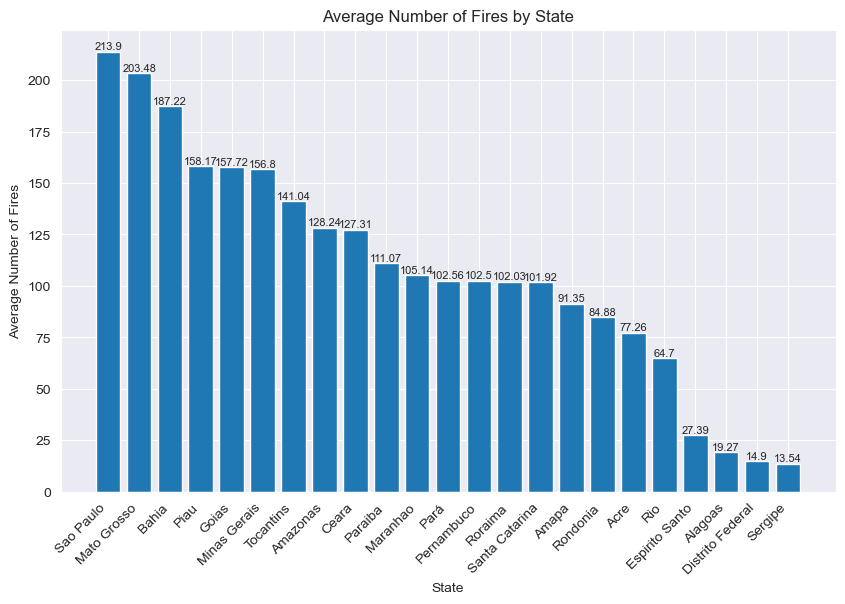

In [166]:
average_fires = average_fires.sort_values(by='number', ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_fires['state'], average_fires['number'])
plt.xlabel('State')
plt.ylabel('Average Number of Fires')
plt.title('Average Number of Fires by State')

# Annotating the numerical values on top of the bars
for i, value in enumerate(average_fires['number']):
    plt.text(i, value + 0.1, str(round(value, 2)), ha='center', va='bottom', fontsize=8)

plt.xticks(range(len(average_fires)), average_fires['state'], rotation='45', ha='right')

plt.show()

# 18. Find the state names where fires were reported in 'dec' month

In [167]:
dec_report = dp.loc[dp['month'] == 'December']

dec_report['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

# II. MovieLens 25M Dataset

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile


rating_df=pd.read_csv('ratings.csv')
tag_df=pd.read_csv('tags.csv')
scores_df=pd.read_csv('genome-scores.csv')
movies_df=pd.read_csv('movies.csv')
link_df=pd.read_csv('links.csv')
gtag_df=pd.read_csv('genome-tags.csv')

# 1. How many movies are released each year? What is the percentage of change over time?

In [19]:
rating_df['timestamp'] = pd.to_datetime(rating_df['timestamp'], unit='s')

rating_df['year']=rating_df['timestamp'].dt.year

rating_df

,userId,movieId,rating,timestamp,year
0,1,296,5.0,2006-05-17 15:34:04,2006
1,1,306,3.5,2006-05-17 12:26:57,2006
2,1,307,5.0,2006-05-17 12:27:08,2006
3,1,665,5.0,2006-05-17 15:13:40,2006
4,1,899,3.5,2006-05-17 12:21:50,2006
...,...,...,...,...,...
25000090,162541,50872,4.5,2009-04-28 21:16:12,2009
25000091,162541,55768,2.5,2009-04-28 20:53:18,2009
25000092,162541,56176,2.0,2009-04-28 20:31:37,2009
25000093,162541,58559,4.0,2009-04-28 21:17:14,2009


In [90]:
movies_per_year['change'] = movies_per_year['movies'].pct_change() * 100

movies_per_year

,year,movies,change
0,1874,1,NaN
1,1878,1,0.000000
2,1880,1,0.000000
3,1883,1,0.000000
4,1887,1,0.000000
...,...,...,...
130,2015,4203,1.570807
131,2016,4071,-3.140614
132,2017,3925,-3.586342
133,2018,3329,-15.184713


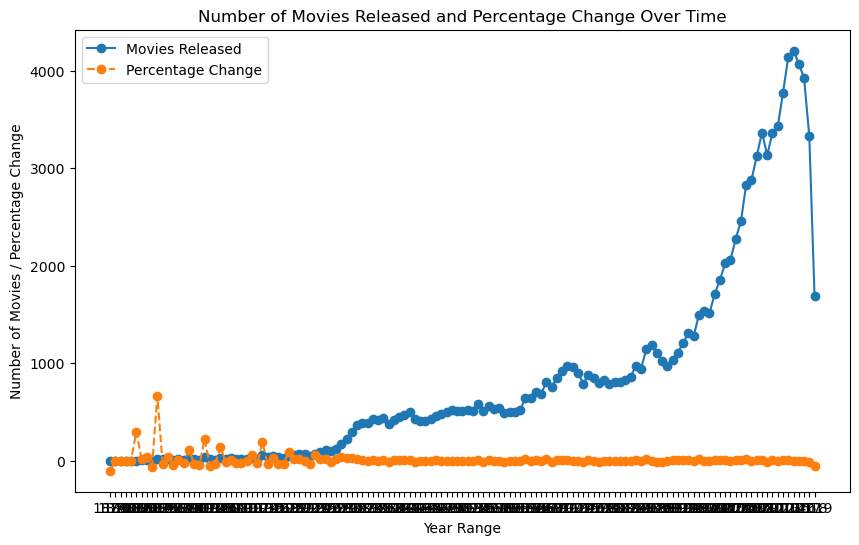

In [103]:
movies_df['year'] = movies_df['title'].str.findall('\((\d{4})\)').str.get(0)

movies_per_year = movies_df['year'].value_counts().sort_index()

years = movies_per_year.index
movie_counts = movies_per_year.values

previous_counts = np.roll(movie_counts, 1)
percentage_change = ((movie_counts - previous_counts) / previous_counts) * 100

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(years, movie_counts, marker='o', linestyle='-', label='Movies Released')
ax.plot(years, percentage_change, marker='o', linestyle='--', label='Percentage Change')

ax.set_xlabel('Year Range')
ax.set_ylabel('Number of Movies / Percentage Change')
ax.set_title('Number of Movies Released and Percentage Change Over Time')
ax.legend()


plt.show()

# 2. What are the most popular genre of movies?

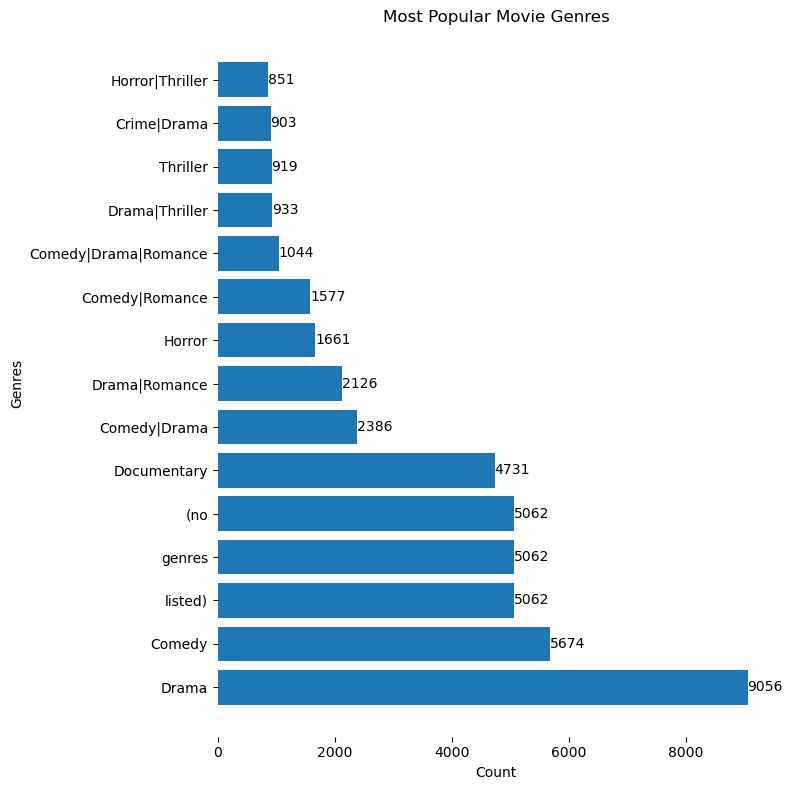

In [137]:
count = movies_df['genres'].str.split(expand=True).stack().value_counts()

popular_genre = count.head(15)

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(popular_genre.index, popular_genre.values)
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xlabel('Count')
ax.set_ylabel('Genres')
ax.set_title('Most Popular Movie Genres')

for i, count in enumerate(popular_genre.values):
    ax.text(count, i, str(count), ha='left', va='center')

plt.tight_layout()
plt.show()

# 3. Does the taste of movies changes over time?

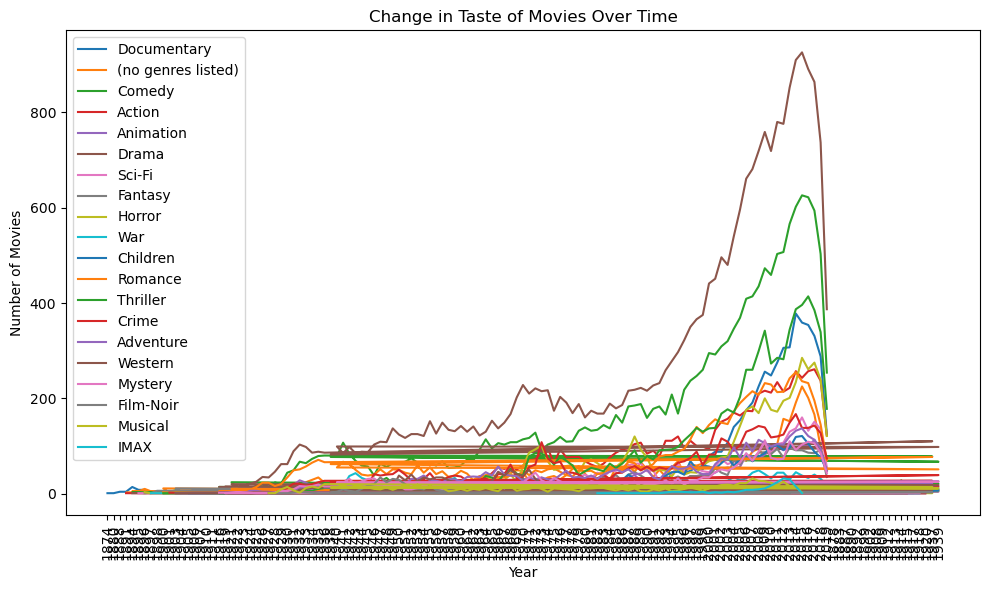

In [144]:
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)', expand=False)

changeingenre = movies_df.groupby(['year', 'genres']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10, 6))
for genre in change_in_genre['genres'].unique():
    genre_data = changeingenre[changeingenre['genres'] == genre]
    ax.plot(genre_data['year'], genre_data['count'], label=genre)

ax.set_ylabel('Number of Movies')
ax.set_xlabel('Year')
ax.set_title('Change in Taste of Movies Over Time')
ax.legend()

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# 4. What are the top 20 movies that has the top amount of users rating and has the highest rate?

In [145]:
rating_avg = rating_df.groupby('movieId')['rating'].mean().reset_index()
rating_count = rating_df.groupby('movieId')['rating'].count()

top20movies = rating_count.sort_values(ascending=False).head(20).reset_index()

movie_titles = movies_df[['movieId', 'title']].set_index('movieId')['title'].to_dict()
top20movies['movie_title'] = top20movies['movieId'].map(movie_titles)

top20movies.rename(columns={'movieId': 'Movie ID', 'rating': 'Rating Count', 'movie_title': 'Movie Title'}, inplace=True)
top20movies.reset_index(drop=True, inplace=True)

print(top_20_movies)

    Movie ID  Rating Count                                        Movie Title
0        356         81491                                Forrest Gump (1994)
1        318         81482                   Shawshank Redemption, The (1994)
2        296         79672                                Pulp Fiction (1994)
3        593         74127                   Silence of the Lambs, The (1991)
4       2571         72674                                 Matrix, The (1999)
5        260         68717          Star Wars: Episode IV - A New Hope (1977)
6        480         64144                               Jurassic Park (1993)
7        527         60411                            Schindler's List (1993)
8        110         59184                                  Braveheart (1995)
9       2959         58773                                  Fight Club (1999)
10       589         57379                  Terminator 2: Judgment Day (1991)
11      1196         57361  Star Wars: Episode V - The Empire St

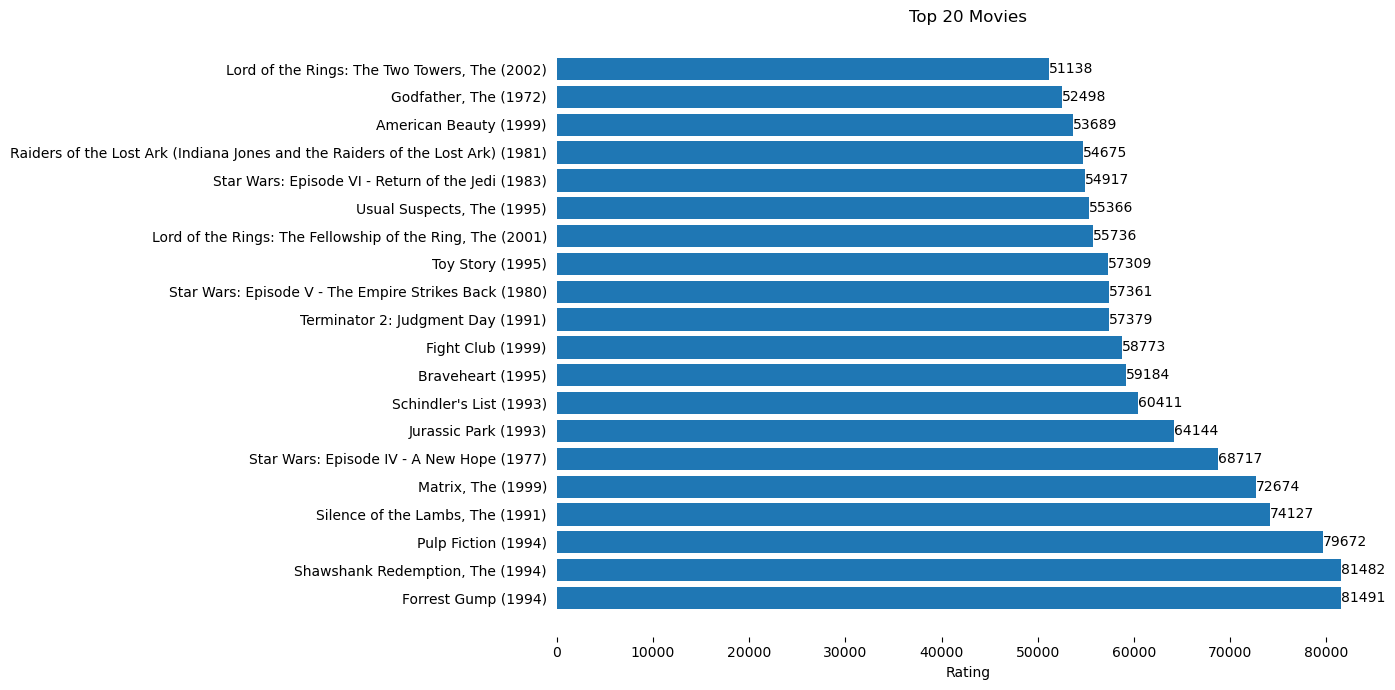

In [74]:
fig, ax = plt.subplots(figsize=(14, 7))

top20moviessorted = top20movies.sort_values('rating', ascending=False)


bars = ax.barh(top_20_movies['title'], top_20_movies['rating'])
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.tick_params(left=False, labelleft=True)
ax.set_xlabel('Rating')

for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, bar.get_width(), ha='left', va='center')

ax.set_title("Highest User Rating")

plt.tight_layout()
plt.show()


In [147]:
merged_df = pd.merge(rating_avg, rating_count, on='movieId', suffixes=('_avg', '_count'))
sorted_df = merged_df.sort_values(by='rating_count', ascending=False)

top20movies = sorted_df.head(20).copy()

movie_titles = movies_df[['movieId', 'title']].set_index('movieId')['title'].to_dict()
top20movies['movie_title'] = top20movies['movieId'].map(movie_titles)

sorted_20 = top20movies.sort_values(by='rating_avg', ascending=False)
sorted_20.rename(columns={'movieId': 'Movie ID', 'rating_avg': 'Average Rating', 'rating_count': 'Rating Count', 'movie_title': 'Movie Title'}, inplace=True)
sorted_20.reset_index(drop=True, inplace=True)

print(sorted_20)

    Movie ID  Average Rating  Rating Count  \
0        318        4.413576         81482   
1        858        4.324336         52498   
2         50        4.284353         55366   
3        527        4.247579         60411   
4       2959        4.228311         58773   
5        296        4.188912         79672   
6       2571        4.154099         72674   
7        593        4.151342         74127   
8       1196        4.144122         57361   
9       1198        4.123923         54675   
10       260        4.120189         68717   
11      2858        4.107340         53689   
12      4993        4.091189         55736   
13      5952        4.068051         51138   
14       356        4.048011         81491   
15       110        4.002273         59184   
16      1210        3.996513         54917   
17       589        3.946374         57379   
18         1        3.893708         57309   
19       480        3.679175         64144   

                                 

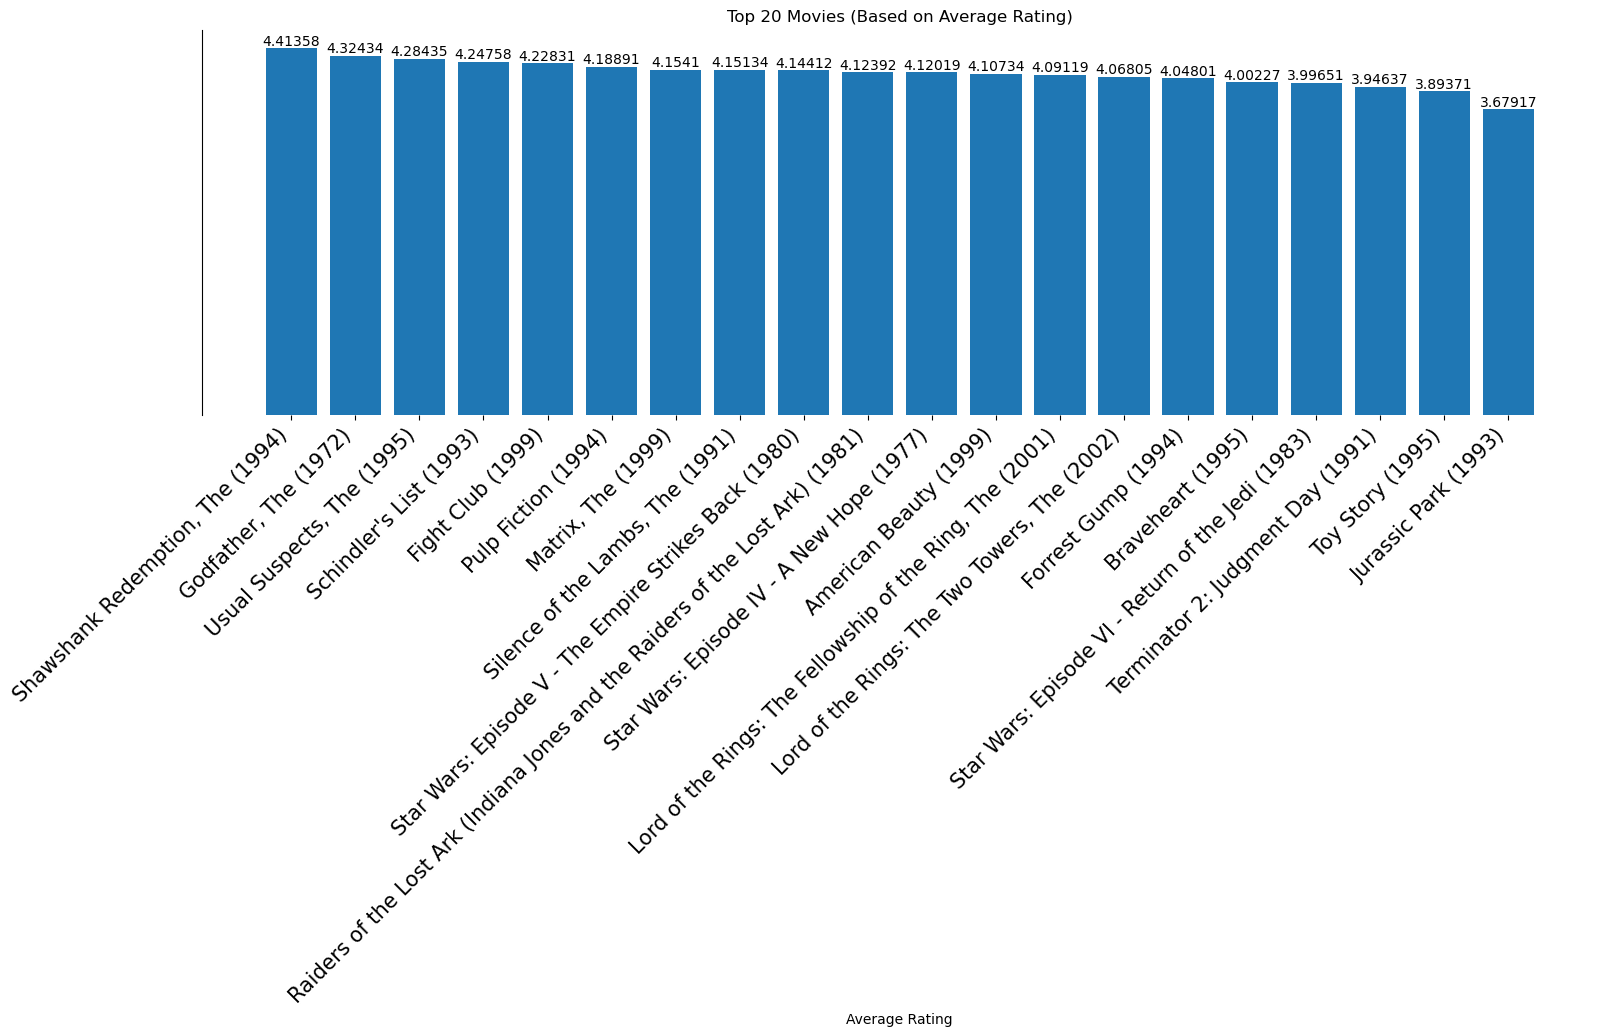

In [82]:
fig, ax = plt.subplots(figsize=(18, 5))

bars = plt.bar(top20moviesorted['title'], top20moviesorted['rating_avg'])
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.tick_params(left=False, labelleft=False)
ax.set_xlabel('Average Rating')
ax.bar_label(bars)
plt.title("Highest Average Rating")
plt.xticks(rotation=45, ha='right', fontsize=15) 

plt.show()

# 5. What is the most of popular season for releasing movies?

In [159]:
import matplotlib.pyplot as plt

def get_season(month):
    if month in [1, 2, 12]:
        return 'Winter'
    if month in [3, 4, 5]:
        return 'Spring'
    if month in [6, 7, 8]:
        return 'Summer'
    if month in [9, 10, 11]:
        return 'Autumn'

movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)', expand=False)
movies_df['year'] = pd.to_numeric(movies_df['year'])

movies_df['season'] = pd.to_datetime(movies_df['year'], format='%Y').dt.month.apply(get_season)

moviesperseason = movies_df['season'].value_counts().reset_index()
moviesperseason.columns = ['Season', 'Movie Count']

releasemovie = movies_per_season.loc[movies_per_season['Movie Count'].idxmax()]

mostpopularseason = release_movie ['Season']
moviecount = largest_movie_season['Movie Count']

print("The most popular season for releasing movies is", most_popular_season, "with", movie_count, "movies.")

The most popular season for releasing movies is Winter with 111815 movies.
